In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import textwrap
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Read in the data

In [ ]:
male_female = pd.read_csv("male_femal_dataset.csv")

Exploritoty Data Analysis

In [3]:
male_female.head()
male_female.CREDDESC.value_counts()

CREDDESC
Bachelor’s Degree                       5414
Master's Degree                         1832
Associate's Degree                      1183
Undergraduate Certificate or Diploma     889
First Professional Degree                503
Doctoral Degree                          186
Graduate/Professional Certificate         29
Name: count, dtype: int64

In [4]:
# male_female.CREDDESC.value_counts() #head()
# male_female = male_female[male_female['CREDDESC']=='Bachelor’s Degree']
male_female.CIPDESC.value_counts()

CIPDESC
Business Administration, Management and Operations.                                   1293
Liberal Arts and Sciences, General Studies and Humanities.                             565
Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing.     492
Criminal Justice and Corrections.                                                      479
Accounting and Related Services.                                                       440
                                                                                      ... 
Teaching English or French as a Second or Foreign Language.                              1
Religious Education.                                                                     1
Human Biology.                                                                           1
Biochemical Engineering.                                                                 1
Food Science and Technology.                                                      

In [5]:
male_female.CONTROL.value_counts()

CONTROL
Public                 5746
Private, for-profit    2404
Private, nonprofit     1886
Name: count, dtype: int64

In [6]:
# male_female['HD2019.Historically Black College or University'] = male_female['HD2019.Historically Black College or University'].map({'Yes': 1, 'No': 0, np.nan: 0})
male_female['HD2019.Tribal college'] = male_female['HD2019.Tribal college'].map({'Yes': 'Tribal', 'No': 'Not Tribal', np.nan: 'Not Tribal'})
# male_female['HD2019.Historically Black College or University']
male_female['hbcu'] = male_female['HD2019.Historically Black College or University']
male_female['tribal'] = male_female['HD2019.Tribal college']
male_female['school_size'] = male_female['HD2019.Institution size category.1']
male_female['urban'] = male_female['HD2019.Degree of urbanization (Urban-centric locale)']

In [7]:
male_female.head()

,Unnamed: 0,UNITID,INSTNM,year_x,CIPDESC,CREDDESC,CIPCODE,CONTROL,EARN_MALE_NE_MDN_3YR,EARN_NOMALE_NE_MDN_3YR,...,HD2019.Carnegie Classification 2018: Graduate Instructional Program,HD2019.Carnegie Classification 2018: Undergraduate Profile,HD2019.Carnegie Classification 2018: Enrollment Profile,HD2019.Carnegie Classification 2018: Size and Setting,HD2019.Institution size category.1,male_differential,hbcu,tribal,school_size,urban
0,0,100663,University of Alabama at Birmingham,2019,Communication and Media Studies.,Bachelor’s Degree,901,Public,34592,34576,...,Research Doctoral: STEM-dominant,"Four-year, medium full-time , selective, highe...",Majority undergraduate,"Four-year, large, primarily nonresidential","20,000 and above",16,No,Not Tribal,"20,000 and above",City: Midsize
1,1,100663,University of Alabama at Birmingham,2019,"Engineering, General.",Master's Degree,1401,Public,90431,98288,...,Research Doctoral: STEM-dominant,"Four-year, medium full-time , selective, highe...",Majority undergraduate,"Four-year, large, primarily nonresidential","20,000 and above",-7857,No,Not Tribal,"20,000 and above",City: Midsize
2,2,100663,University of Alabama at Birmingham,2019,"Psychology, General.",Bachelor’s Degree,4201,Public,27501,33227,...,Research Doctoral: STEM-dominant,"Four-year, medium full-time , selective, highe...",Majority undergraduate,"Four-year, large, primarily nonresidential","20,000 and above",-5726,No,Not Tribal,"20,000 and above",City: Midsize
3,3,100663,University of Alabama at Birmingham,2019,Criminal Justice and Corrections.,Bachelor’s Degree,4301,Public,43827,38520,...,Research Doctoral: STEM-dominant,"Four-year, medium full-time , selective, highe...",Majority undergraduate,"Four-year, large, primarily nonresidential","20,000 and above",5307,No,Not Tribal,"20,000 and above",City: Midsize
4,4,100663,University of Alabama at Birmingham,2019,Dentistry.,First Professional Degree,5104,Public,141123,139659,...,Research Doctoral: STEM-dominant,"Four-year, medium full-time , selective, highe...",Majority undergraduate,"Four-year, large, primarily nonresidential","20,000 and above",1464,No,Not Tribal,"20,000 and above",City: Midsize


# Create dummy vars for categorical values for OLS Regression

In [8]:
reg_data = male_female#[male_female['CREDDESC']=="Master's Degree"]#[male_female['CIPDESC'].map(male_female['CIPDESC'].value_counts()) > 10]
Y = reg_data["male_differential"]/reg_data['EARN_MALE_NE_MDN_3YR']*100
X = reg_data[['CIPDESC', 'CONTROL', 'INSTNM', 'CREDDESC', 'hbcu', 'tribal', 'school_size', 'urban']] #, 'HD2019.Tribal college']]
# Drop the most frequent category
def get_dummies_most_frequent(df, column):
    # Find the most frequent category
    most_frequent_value = df[column].mode()[0]  
    print("dropped ", column, ": ", most_frequent_value)
    
    # Convert the column to dummies and drop the most frequent category manually
    dummies = pd.get_dummies(df[column])
    
    # Drop the column corresponding to the most frequent category
    dummies = dummies.drop(columns=[most_frequent_value])
    
    return dummies

dummies = get_dummies_most_frequent(X, 'CIPDESC')
dummies2 = get_dummies_most_frequent(X, 'CONTROL')
# dummies3 = get_dummies_most_frequent(X, 'INSTNM')
dummies4 = get_dummies_most_frequent(X, 'CREDDESC')
dummies5 = get_dummies_most_frequent(X, 'hbcu')
dummies6 = get_dummies_most_frequent(X, 'tribal')
dummies7 = get_dummies_most_frequent(X, 'school_size')
dummies8 = get_dummies_most_frequent(X, 'urban')

X = X.join(dummies8)
X = X.join(dummies)
X = X.drop(columns=['CONTROL', 'INSTNM', 'CIPDESC', 'CREDDESC', 'hbcu', 'tribal', 'school_size', 'urban'])
X = X.join(dummies2)
# X = X.join(dummies3)
X = X.join(dummies4)
X = X.join(dummies5)
X = X.join(dummies6)
X = X.join(dummies7)

X.head()

dropped  CIPDESC :  Business Administration, Management and Operations.
dropped  CONTROL :  Public
dropped  CREDDESC :  Bachelor’s Degree
dropped  hbcu :  No
dropped  tribal :  Not Tribal
dropped  school_size :  20,000 and above
dropped  urban :  City: Large


,City: Midsize,City: Small,Rural: Distant,Rural: Fringe,Rural: Remote,Suburb: Large,Suburb: Midsize,Suburb: Small,Town: Distant,Town: Fringe,...,Master's Degree,Undergraduate Certificate or Diploma,Yes,Tribal,"1,000 - 4,999","10,000 - 19,999","5,000 - 9,999",Not applicable,Not reported,"Under 1,000"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
X = X.astype(int)
X_Sm= sm.add_constant(X)
ols_model = sm.OLS(Y, X_Sm).fit()

In [10]:
print(ols_model.summary())
pd.set_option('display.max_rows', None)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     15.23
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:49:28   Log-Likelihood:                -40716.
No. Observations:               10036   AIC:                         8.191e+04
Df Residuals:                    9797   BIC:                         8.363e+04
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

#### Visualizations to help explain OLS Regression

In [11]:
# Get p-values less than 0.05 (statistically significant)
significant = ols_model.pvalues[ols_model.pvalues < 0.05]

# Get corresponding coefficients
coeffs = ols_model.params[significant.index]

# Get confidence intervals
conf_int = ols_model.conf_int().loc[significant.index]

# Combine everything into one DataFrame
results = pd.DataFrame({
    'coefficient': coeffs,
    'p_value': significant,
    'CI_0.025': conf_int[0],
    'CI_0.975': conf_int[1]
})

rows_to_exclude = [
    "Private, for-profit",
    "Private, nonprofit",
    "Associate's Degree",
    "Doctoral Degree",
    "First Professional Degree",
    "Master's Degree",
    "Undergraduate Certificate or Diploma",
    "Yes",
    "Not applicable",
    "Not reported",
    "Under 1,000",
    "const",
    "City: Small",
    "Town: Distant",
    "Town: Fringe",
    "Town: Remote",
    "1,000 - 4,999"
]

# Filter them out
filtered_results = results[~results.index.isin(rows_to_exclude)]

len(filtered_results)

104

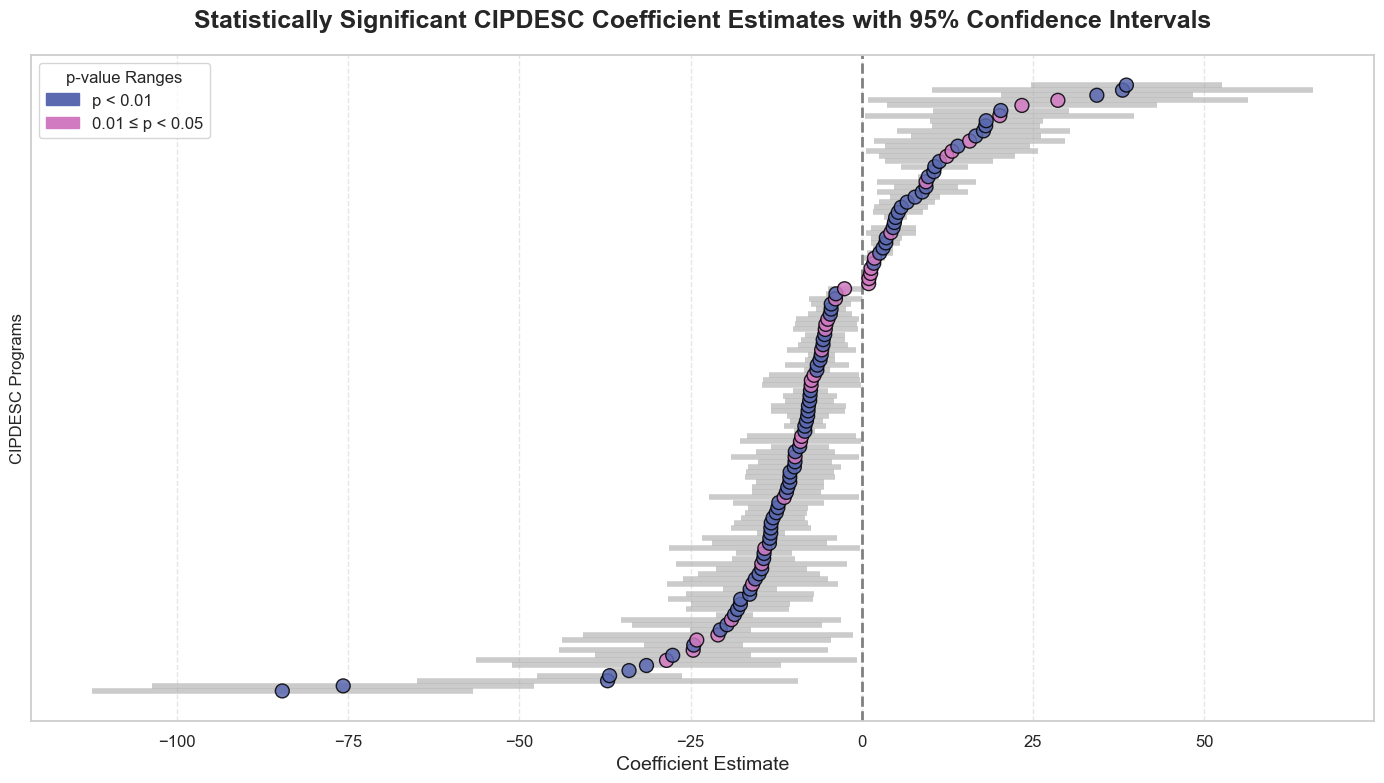

In [12]:
# Sort the data for cleaner layout
data = results.sort_values('coefficient')

# Set a more modern and minimal style
sns.set(style="whitegrid")

# Create a soft color map for p-value ranges using pastel shades
p_value_bins = [0, 0.01, 0.05, 1]
colors = ['#5a69b0', '#d17ac2']  # Pastel blue, purple, and green
labels = ['p < 0.01', '0.01 ≤ p < 0.05']

# Assign a color to each coefficient based on its p-value
color_map = np.digitize(data['p_value'], bins=p_value_bins) - 1
scatter_colors = [colors[i] for i in color_map]

# Create the figure with a larger size for better readability
plt.figure(figsize=(14, 8))

# Plot horizontal confidence intervals (make them thicker and more vibrant)
plt.hlines(y=data.index, xmin=data['CI_0.025'], xmax=data['CI_0.975'], color='darkgray', linewidth=4, alpha=0.6)

# Plot the coefficient dots (color-coded based on p-value)
plt.scatter(data['coefficient'], data.index, c=scatter_colors, s=100, edgecolors='black', alpha=0.85, zorder=3)

# Vertical reference line at 0 with thicker styling
plt.axvline(0, color='gray', linestyle='--', linewidth=2)

# Titles and labels with updated font sizes and weight
plt.title("Statistically Significant CIPDESC Coefficient Estimates with 95% Confidence Intervals", fontsize=18, weight='bold', pad=20)
plt.xlabel("Coefficient Estimate", fontsize=14)
plt.ylabel("CIPDESC Programs")  # Optional: leave y-axis title blank if the labels are self-explanatory

# Add grid just on x-axis for readability, softer style
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Create a custom legend for p-value ranges with a softer look
legend_labels = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_labels, title="p-value Ranges", loc='upper left', fontsize=12)

# Remove the vertical y-axis labels for a cleaner look
plt.yticks([])

# Tweak layout for clarity
plt.xticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


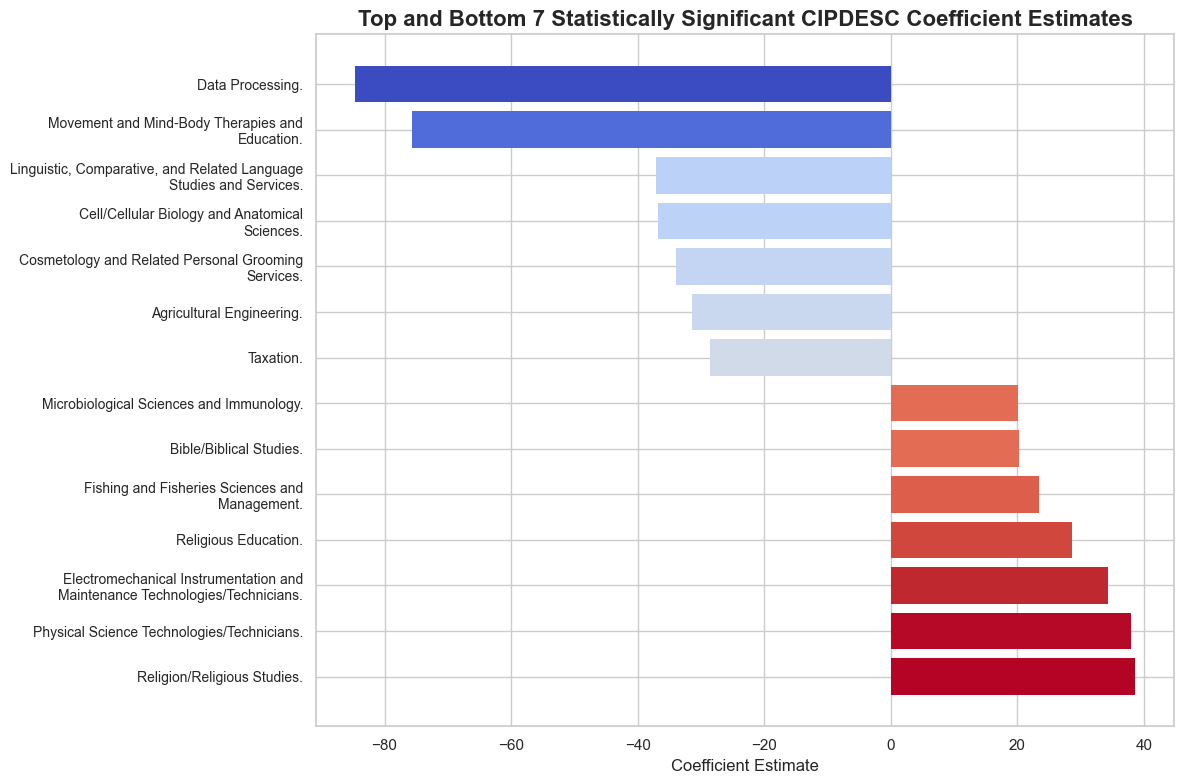

In [13]:
# Wrap long labels for better display
def wrap_label(label, width=45):
    return "\n".join(textwrap.wrap(label, width))

# Sort the data to get the 10 highest and lowest coefficients
top_bottom_coeffs = pd.concat([
    results.nlargest(7, "coefficient"),
    results.nsmallest(7, "coefficient")
])
top_bottom_coeffs = top_bottom_coeffs.sort_values("coefficient")

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Bar height adjustments
y_positions = np.arange(len(top_bottom_coeffs))
bar_height = 0.8

# Use a more balanced diverging color palette
cmap = plt.cm.coolwarm  # Or use sns.diverging_palette(220, 20, as_cmap=True) for a seaborn variant

# Get the values and labels
values = top_bottom_coeffs['coefficient'].values
labels = top_bottom_coeffs.index

# Normalize coefficient values to colormap
norm = plt.Normalize(values.min(), values.max())
colors = cmap(norm(values))

# Plot horizontal bar chart with new colors
bars = ax.barh(y_positions, values, height=bar_height, color=colors, edgecolor='none')

# Apply labels, ensuring wrapping
ax.set_yticks(y_positions)
ax.set_yticklabels([wrap_label(label) for label in labels], fontsize=10)
ax.set_xlabel("Coefficient Estimate", fontsize=12)
ax.set_title("Top and Bottom 7 Statistically Significant CIPDESC Coefficient Estimates", fontsize=16, weight='bold')

# Add colorbar with better contrast
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(values)
# cbar = fig.colorbar(sm, ax=ax, label="Coefficient Value")

# # Make the colorbar ticks readable
# cbar.ax.tick_params(labelsize=10)

# Invert y-axis so higher coefficients appear at the top
ax.invert_yaxis()

# Clean layout
plt.tight_layout()
plt.show()


In [14]:
# Count of coefficients significant at p < 0.01
p_less_001 = (filtered_results['p_value'] < 0.01).sum()

# Count of coefficients significant at p < 0.05
p_less_005 = (filtered_results['p_value'] < 0.05).sum()

print(f"Significant at p < 0.01: {p_less_001}")
print(f"Significant at p < 0.05: {p_less_005}")
max_coeff = filtered_results['coefficient'].max()
min_coeff = filtered_results['coefficient'].min()

print(f"Maximum coefficient: {max_coeff}")
print(f"Minimum coefficient: {min_coeff}")

Significant at p < 0.01: 75
Significant at p < 0.05: 104
Maximum coefficient: 38.61611672917388
Minimum coefficient: -84.59552132716098


## Lasso Regression 

Clean data for Lasso Regression

In [15]:
reg_data_lasso = male_female#[male_female['CREDDESC']=="Master's Degree"]#[male_female['CIPDESC'].map(male_female['CIPDESC'].value_counts()) > 10]
Y = reg_data_lasso["male_differential"]/reg_data_lasso['EARN_MALE_NE_MDN_3YR']*100
X = reg_data_lasso[['CIPDESC', 'CONTROL', 'INSTNM', 'CREDDESC', 'hbcu', 'tribal', 'school_size', 'urban']] #, 'HD2019.Tribal college']]
# Drop the most frequent category
def get_dummies_most_frequent(df, column):
    # Find the most frequent category
    most_frequent_value = df[column].mode()[0]  
    print("dropped ", column, ": ", most_frequent_value)
    
    # Convert the column to dummies and drop the most frequent category manually
    dummies = pd.get_dummies(df[column])
    
    # Drop the column corresponding to the most frequent category
    dummies = dummies.drop(columns=[most_frequent_value])
    
    return dummies

dummies = get_dummies_most_frequent(X, 'CIPDESC')
dummies2 = get_dummies_most_frequent(X, 'INSTNM')
dummies3 = get_dummies_most_frequent(X, 'CREDDESC')

X = X.drop(columns=['CONTROL', 'INSTNM', 'CIPDESC', 'CREDDESC', 'hbcu', 'tribal', 'school_size', 'urban'])

X = X.join(dummies)
X = X.join(dummies2)
X = X.join(dummies3)

X.head()

dropped  CIPDESC :  Business Administration, Management and Operations.
dropped  INSTNM :  Arizona State University Campus Immersion
dropped  CREDDESC :  Bachelor’s Degree


,Accounting and Related Services.,"Aerospace, Aeronautical and Astronautical Engineering.",Agricultural Business and Management.,Agricultural Engineering.,Agricultural Production Operations.,"Agriculture, Agriculture Operations, and Related Sciences, Other.","Agriculture, General.",Air Transportation.,"Allied Health Diagnostic, Intervention, and Treatment Professions.",Allied Health and Medical Assisting Services.,...,Yale University,Yeshiva University,York Technical College,Youngstown State University,Associate's Degree,Doctoral Degree,First Professional Degree,Graduate/Professional Certificate,Master's Degree,Undergraduate Certificate or Diploma
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [16]:
# Step 1: Prepare your data
reg_data = male_female
Y = Y
X = X

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Lasso Regression (with CV to select alpha)
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, Y)
lasso_preds = lasso.predict(X_scaled)  # Use the full data for prediction
lasso_mse = mean_squared_error(Y, lasso_preds)  # Evaluate on full data

# Step 5: Output results
print(f"Lasso MSE (on full data): {lasso_mse:.4f}, Best Alpha: {lasso.alpha_}")

Lasso MSE (on full data): 114.8523, Best Alpha: 0.08431859169004277


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Get R² score
lasso_r2 = lasso.score(X_scaled, Y)

# Get coefficient names
feature_names = X.columns

# Create DataFrames for the coefficients
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Lasso Coef': lasso.coef_
})

# Merge for comparison
coef_compare = lasso_coef_df
coef_compare = coef_compare.sort_values(by='Lasso Coef', key=lambda x: abs(x), ascending=False)

# Print summary
print("\n=== Lasso Regression Summary ===")
print(f"R² Score: {lasso_r2:.4f}")
print(f"Best Alpha: {lasso.alpha_}")
print(coef_compare[['Feature', 'Lasso Coef']].head(10))  # Top 10 coefficients



=== Lasso Regression Summary ===
R² Score: 0.5714
Best Alpha: 0.08431859169004277
                                                Feature  Lasso Coef
2005                               Texas Barber College   -3.523611
472                        Capilo School of Hair Design   -2.661996
57    Cosmetology and Related Personal Grooming Serv...   -2.277776
58                    Criminal Justice and Corrections.    2.250651
43                     Communication and Media Studies.   -1.769255
81            English Language and Literature, General.   -1.725097
382                      Brigham Young University-Idaho    1.554710
192   Somatic Bodywork and Related Therapeutic Servi...    1.372673
285          Artistic Nails and Beauty Academy-Lakeland   -1.339194
286             Artistic Nails and Beauty Academy-Tampa   -1.339194


In [18]:
non_zero_lasso = lasso_coef_df[lasso_coef_df['Lasso Coef'] != 0]


In [19]:
# --- Data Prep ---
reg_data_lasso = male_female

Y = reg_data_lasso["male_differential"] / reg_data_lasso['EARN_MALE_NE_MDN_3YR'] * 100

X = reg_data_lasso[['CIPDESC', 'CONTROL', 'INSTNM', 'CREDDESC', 'hbcu', 'tribal', 'school_size', 'urban']]

# --- Helper to one-hot encode and preserve category info ---
def get_dummies_with_prefix(df, column):
    most_freq = df[column].mode()[0]
    print("Dropped:", column, "-", most_freq)
    dummies = pd.get_dummies(df[column], prefix=column)
    dummies = dummies.drop(f"{column}_{most_freq}", axis=1)
    return dummies

# One-hot encode relevant features and retain context
dummies_cipdesc = get_dummies_with_prefix(X, 'CIPDESC')
dummies_instnm = get_dummies_with_prefix(X, 'INSTNM')
dummies_creddesc = get_dummies_with_prefix(X, 'CREDDESC')

# Drop original categorical columns
X = X.drop(columns=['CIPDESC', 'INSTNM', 'CREDDESC'])

# Combine one-hot columns
X_encoded = pd.concat([dummies_cipdesc, dummies_instnm, dummies_creddesc], axis=1)

# --- Lasso Regression ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, Y)

# Evaluation
lasso_preds = lasso.predict(X_scaled)
lasso_mse = mean_squared_error(Y, lasso_preds)
lasso_r2 = lasso.score(X_scaled, Y)

# --- Coefficient Output ---
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Lasso Coef': lasso.coef_
})

# Sort by absolute value of coefficient
coef_df = coef_df.sort_values(by='Lasso Coef', key=lambda x: abs(x), ascending=False)

# --- Display ---
print(f"\n=== Lasso Regression Summary ===")
print(f"R² Score: {lasso_r2:.4f}")
print(f"Best Alpha: {lasso.alpha_}")
print(f"Lasso MSE: {lasso_mse:.4f}")
print(coef_df.head(15))


Dropped: CIPDESC - Business Administration, Management and Operations.
Dropped: INSTNM - Arizona State University Campus Immersion
Dropped: CREDDESC - Bachelor’s Degree

=== Lasso Regression Summary ===
R² Score: 0.5714
Best Alpha: 0.08431859169004277
Lasso MSE: 114.8523
                                                Feature  Lasso Coef
2005                        INSTNM_Texas Barber College   -3.523611
472                 INSTNM_Capilo School of Hair Design   -2.661996
57    CIPDESC_Cosmetology and Related Personal Groom...   -2.277776
58            CIPDESC_Criminal Justice and Corrections.    2.250651
43             CIPDESC_Communication and Media Studies.   -1.769255
81    CIPDESC_English Language and Literature, General.   -1.725097
382               INSTNM_Brigham Young University-Idaho    1.554710
192   CIPDESC_Somatic Bodywork and Related Therapeut...    1.372673
285   INSTNM_Artistic Nails and Beauty Academy-Lakeland   -1.339194
286      INSTNM_Artistic Nails and Beauty Academ

In [20]:
# Split based on prefixes
cipdesc_coefs = coef_df[coef_df['Feature'].str.startswith('CIPDESC_')].copy()
instnm_coefs = coef_df[coef_df['Feature'].str.startswith('INSTNM_')].copy()
creddesc_coefs = coef_df[coef_df['Feature'].str.startswith('CREDDESC_')].copy()


In [21]:
creddesc_coefs

,Feature,Lasso Coef
2465,CREDDESC_Associate's Degree,1.334589
2469,CREDDESC_Master's Degree,0.627191
2468,CREDDESC_Graduate/Professional Certificate,-0.093243
2466,CREDDESC_Doctoral Degree,-0.000000
2467,CREDDESC_First Professional Degree,-0.000000
2470,CREDDESC_Undergraduate Certificate or Diploma,0.000000


/var/folders/2h/f906sd_j74jc6_9x83gsf8280000gn/T/ipykernel_2671/1823524587.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instnm_bachelor_coefs['Abs Coef'] = instnm_bachelor_coefs['Lasso Coef'].abs()
/var/folders/2h/f906sd_j74jc6_9x83gsf8280000gn/T/ipykernel_2671/1823524587.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_instnm_bachelor_coefs['Feature'] = top_instnm_bachelor_coefs['Feature'].str.replace('INSTNM_', '', regex=False)
/var/folders/2h/f906sd_j74jc6_9x83gsf8280000gn/T/ipykernel_267

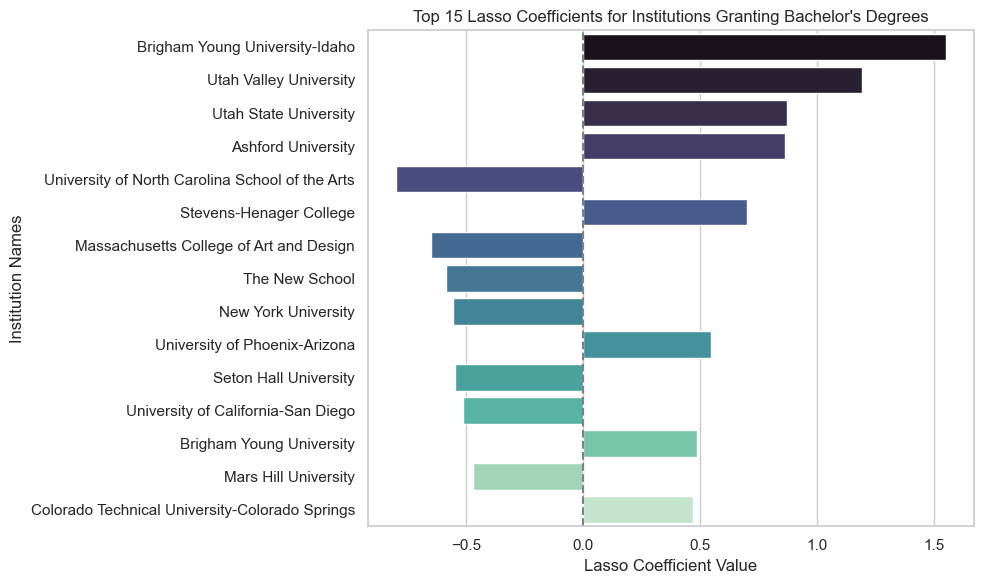

In [22]:
# First, filter the original DataFrame or DataFrame of interest (assumed 'male_female') for institutions granting Bachelor’s degrees
bachelors_institutions = male_female[male_female['CREDDESC'] == "Bachelor’s Degree"]

# Now, filter `instnm_coefs` to only include those institutions from the filtered DataFrame
bachelor_institutions = bachelors_institutions['INSTNM'].unique()

# Filter `instnm_coefs` to include only the institutions in the bachelors_institutions list
instnm_bachelor_coefs = instnm_coefs[instnm_coefs['Feature'].isin([f'INSTNM_{inst}' for inst in bachelor_institutions])]

# Sort by the absolute value of the coefficients
instnm_bachelor_coefs['Abs Coef'] = instnm_bachelor_coefs['Lasso Coef'].abs()
instnm_bachelor_coefs = instnm_bachelor_coefs.sort_values(by='Abs Coef', ascending=False)

# Limit to top 20 most influential features for better readability
top_instnm_bachelor_coefs = instnm_bachelor_coefs.head(15)

# Remove the 'INSTNM_' prefix from the 'Feature' column for cleaner labels
top_instnm_bachelor_coefs['Feature'] = top_instnm_bachelor_coefs['Feature'].str.replace('INSTNM_', '', regex=False)

# Plot with fixed color palette (using 'coolwarm_r' to keep consistent color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='Lasso Coef', y='Feature', data=top_instnm_bachelor_coefs, palette="mako")
plt.axvline(0, color='gray', linestyle='--')
plt.title("Top 15 Lasso Coefficients for Institutions Granting Bachelor's Degrees")
plt.xlabel("Lasso Coefficient Value")
plt.ylabel("Institution Names")
plt.tight_layout()
plt.show()

In [23]:
# Count non-zero and zero coefficients
non_zero_features = np.count_nonzero(lasso.coef_)
print(len(lasso.coef_)-non_zero_features)

1137
